In [1]:
__author__ = "@Tssp"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18
aur = (1 + np.sqrt(5)) / 2
aursize = (5*aur, 5)

In [2]:
delta = np.loadtxt('Simulations/delta_asc_ix6603.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc_ix6603.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [3]:
# Parameters and Constants:
mass = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky = 2*np.pi/lambd
Iy = 4993 * (1e4 / Eh * to * ao**2)
Vy = alpha * Iy # a.u
Iy = Vy/alpha
wy = np.sqrt( 2 * Vy * ky**2 / mass)       
dho = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [4]:
np.sqrt(6042/4993)

1.1000427863426487

In [5]:
print(os.getcwd())
folder_path = "Simulations/ix6042_iy4993_iz50/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q1D


In [6]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x10000_y10000_z10000_120rm8g2l60m14_68CM8g1L60M14_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix6042_iy4993_iz50_LiLi_a3Sup_0{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_int_rm200_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.707666', '.707891', '.7081066', '.708483', '.708822', '.7090948', '.7092404', '.7091583', '.71195', '.71200'] non readed


In [7]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [8]:
print(f"ICIR (delta, asc): (0{delta[27]}, {asc[27]}), (0{delta[42]}, {asc[42]})")

ICIR (delta, asc): (0.7083468, 1250.58444896419), (0.7090032, 1380.42059648854)


In [9]:
dic = transpose_energies(Data)

In [10]:
dic, least_bound_pos = dic_from_least_bound_forward(dic, wy)

Least bound state:  1002 -0.024393531854232063
First trap state:  1003 0.24432374208320168


In [11]:
for key in dic.keys():
    dic[key] = np.sort(dic[key])

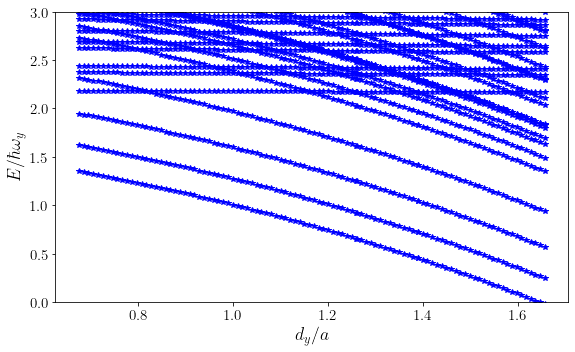

In [12]:
fig, ax = plt.subplots(figsize=aursize)
for i in range(least_bound_pos, least_bound_pos + 30):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'b*')
ax.set_ylim(0, 3)
ax.set_xlabel('$d_{y}/a$')
ax.set_ylabel('$E/\hbar \omega_{y}$')
plt.tight_layout()
fig.savefig('Results/Figures/Ix6042_Iy4993_Iz50_Easc.png', dpi=200)
plt.show()

# Crosses

Energy in x=0.8270618846763502 for the level 1007 is 1.226799029565977e-10
Energy in x=0.8270618846763502 for the level 1008 is 1.259831591641269e-10
Energy in x=0.8270618846763502 for the level 1009 is 1.335094112910361e-10
Energy in x=0.8270618846763502 for the level 1010 is 1.354067259009778e-10
Energy in x=0.8270618846763502 for the level 1011 is 1.388488484244867e-10


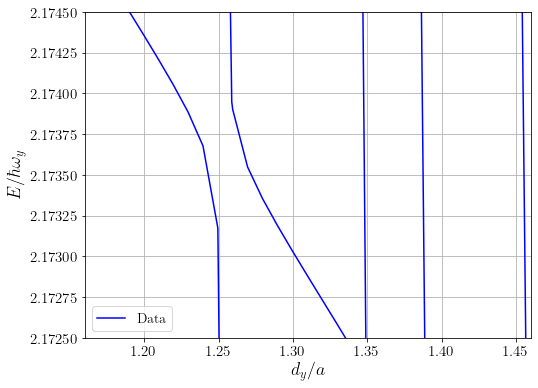

In [15]:
fig2, ax2 = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos + 5, least_bound_pos + 10):
    print(f"Energy in x={x[-16]} for the level {i} is {dic[f'nivel_{i}'][-16]}")
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
#ax2.set_ylim(2.171, 2.175)
ax2.set_ylim(2.1725, 2.1745)
ax2.set_xlim(1.16, 1.46)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.grid()

In [16]:
print(f"ICIR x={x[42]}\n1007: {dic['nivel_1007'][42]/wy}\n1008: {dic['nivel_1008'][42]/wy}\n")
print(f"ICIR x={x[27]}\n1007: {dic['nivel_1007'][27]/wy}\n1010: {dic['nivel_1010'][27]/wy}")

ICIR x=1.2587982063652745
1007: 2.165229907666163
1008: 2.1739469405883614

ICIR x=1.3894871092701506
1007: 1.9639204142150946
1010: 2.172113970743342


In [13]:
%matplotlib

Using matplotlib backend: MacOSX


In [14]:
fig2, ax2 = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos + 5, least_bound_pos + 9):
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.set_ylim(2.171, 2.175)
ax2.set_xlim(1.16, 1.45)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.grid()
xcoord = []
ycoord = []
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    plt.plot(ix, iy, 'ro', markersize=4)
    plt.draw()
    global xcoord, ycoord
    xcoord.append(ix)
    ycoord.append(iy)
    if len(xcoord) == 40:
        fig2.canvas.mpl_disconnect(cid)
        print(f'xcoord: {xcoord}\n ycoord: {ycoord}')
    return xcoord, ycoord
cid = fig2.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [15]:
%matplotlib inline

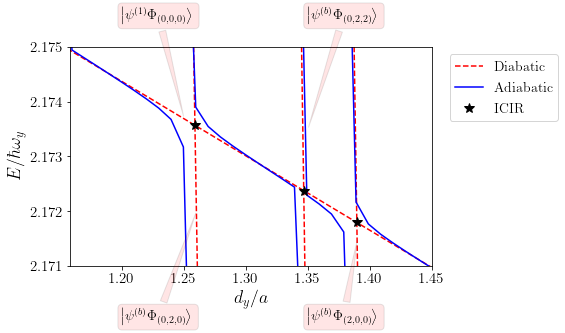

In [43]:
fig3, ax3 = plt.subplots(figsize=aursize)
# nivel 1007:
f1007 = np.polyfit(xcoord, ycoord, deg=1)
x1007 = np.linspace(1, 1.45, num=60)
ax3.plot(x1007, np.polyval(f1007, x1007), 'r--', markersize=4, label='Diabatic')
ax3.plot(x, dic['nivel_1007']/wy, 'b', label='Adiabatic')

# nivel 1008:
f1008 = np.polyfit(x[(x > 1.125) & (x < 1.27)], np.array(dic['nivel_1008'])[(x > 1.125) & (x < 1.27)]/wy, deg=1)
x1008 = np.linspace(1.25, 1.27, num=70)
ax3.plot(x1008, np.polyval(f1008, x1008), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1008']/wy, 'b')

# nivel 1009:
f1009 = np.polyfit(x[(x > 1.22) & (x < 1.34)], np.array(dic['nivel_1009'])[(x > 1.22) & (x < 1.34)]/wy, deg=1)
x1009 = np.linspace(1.33, 1.36, num=100)
ax3.plot(x1009, np.polyval(f1009, x1009), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1009']/wy, 'b')

# nivel 1010:
f1010 = np.polyfit(x[(x > 1.27) & (x < 1.40)], np.array(dic['nivel_1010'])[(x > 1.27) & (x < 1.40)]/wy, deg=1)
x1010 = np.linspace(1.38, 1.41, num=100)
ax3.plot(x1010, np.polyval(f1010, x1010), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1010']/wy, 'b')

# Crosses:
##########
ax3.plot(cross_points(f1007, f1008), np.polyval(f1007, cross_points(f1007, f1008)), 'k*', markersize=10, label='ICIR')
ax3.plot(cross_points(f1007, f1009), np.polyval(f1007, cross_points(f1007, f1009)), 'k*', markersize=10)
ax3.plot(cross_points(f1007, f1010), np.polyval(f1007, cross_points(f1007, f1010)), 'k*', markersize=10)

# States:
#########
ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,0)}\right>$', xy=(1.26, 2.172), xytext=(1.2, 2.17), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.25, 2.1737), xytext=(1.2, 2.1755), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,2)}\right>$', xy=(1.35, 2.1735), xytext=(1.35, 2.1755), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,0)}\right>$', xy=(1.39, 2.1715), xytext=(1.35, 2.17), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.set_xlabel('$d_{y}/a$')
ax3.set_ylabel('$E/\hbar \omega_{y}$')
ax3.legend(fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.set_ylim(2.171, 2.175)
ax3.set_xlim(1.158, 1.45)
plt.tight_layout()
fig3.savefig('Results/Figures/Ix6042_Iy4993_Iz50_Easc_Interpolation.png', dpi=200)

In [35]:
print(f'''Crosses between (x, E):
* 1007-1008: ({cross_points(f1007, f1008)}, {np.polyval(f1007, cross_points(f1007, f1008))})
* 1007-1009: ({cross_points(f1007, f1009)}, {np.polyval(f1007, cross_points(f1007, f1009))})
* 1007-1010: ({cross_points(f1007, f1010)}, {np.polyval(f1007, cross_points(f1007, f1010))})''')

Crosses between (x, E):
* 1007-1008: (1.2587867545497586, 2.1735605908503652)
* 1007-1009: (1.3466141854436804, 2.172375391153715)
* 1007-1010: (1.3894834430941283, 2.17179688588895)


In [36]:
print(f"ICIR: asc/dy = {1/cross_points(f1007, f1008)} and {1/cross_points(f1007, f1010)}")

ICIR: asc/dy = 0.7944157311678092 and 0.7196919149847377


In [4]:
print(f"asc: {0.7944157311678092*dho} and {0.7196919149847377*dho}")

asc: 1380.4331548682244 and 1250.5877486528213


In [37]:
np.savetxt('Results/ICIR_positions_6042_4993_50.txt', [[1.1, 1.1], [1/cross_points(f1007, f1010), 1/cross_points(f1007, f1008)], [np.polyval(f1007, cross_points(f1007, f1010)), np.polyval(f1007, cross_points(f1007, f1008))]], header='wx/wy, asc/dy, E/hwy')

In [34]:
print(f'''Energy gap in the ICIRS:
* 1007-1008: {(dic['nivel_1008'][42] - dic['nivel_1007'][42])/wy}
* 1007-1010: {(dic['nivel_1010'][27] - dic['nivel_1007'][27])/wy}
''')

Energy gap in the ICIRS:
* 1007-1008: 0.008717032922198109
* 1007-1010: 0.2081935565282477

